# Individual Project Keshav Ganesh 3174597

---

## General Imports

In [181]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from scipy.stats import skew
from imblearn.combine import SMOTEENN

---
## Exploratory Data Analysis

### Loading the dataset

In [233]:
df = pd.read_csv("mldata_0003174597.csv",engine='python',index_col=0)

X_df = df[["feature_" + str(i) for i in range(1,31)]]
Y_df = df["label"]

print(df.shape)
df.head()


(1200, 31)


,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,1,3.323968,0.285623,2.139980,0.684375,0.258534,0.704996,3.946897,-0.648590,0.226279,...,-0.038920,-3.145936,-1.485349,2.039098,1.023406,0.539519,-1.926543,-1.676687,0.748736,1.372574
1,0,-4.428040,0.939167,-0.633854,0.236880,0.300720,0.090776,1.132694,-0.356129,-1.877284,...,0.365255,0.643563,1.553742,1.571463,-0.267585,-0.401042,0.586909,-0.001432,-0.626280,-6.015832
2,1,-1.952102,-1.510862,-1.120727,0.440191,1.981144,-0.213573,1.120881,1.036080,-0.335562,...,0.026264,-0.281570,-1.802094,0.509458,0.527807,-0.816587,-0.353949,-2.315150,-0.854082,1.033236
3,0,2.646616,1.217087,-2.289243,-0.907795,1.748714,0.343236,-1.021121,-0.366174,-0.723448,...,1.304496,1.059307,-1.201580,1.722661,0.134701,1.053421,0.665769,-0.209912,-1.252722,0.925126
4,1,-1.893243,1.784285,0.746666,0.487049,0.016664,-1.489809,1.031858,-1.712528,0.549938,...,-0.038996,2.993456,1.907736,-0.784147,-0.330517,-1.055594,-0.076320,6.426636,0.633563,-3.422783


We split the dataset into the X and Y dataframes. The X dataframe contains all the features and the Y dataframe contains all the labels. They are indexed by the same indices.

In [234]:
print(X_df.shape)
X_df.head()

(1200, 30)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,3.323968,0.285623,2.139980,0.684375,0.258534,0.704996,3.946897,-0.648590,0.226279,-2.730369,...,-0.038920,-3.145936,-1.485349,2.039098,1.023406,0.539519,-1.926543,-1.676687,0.748736,1.372574
1,-4.428040,0.939167,-0.633854,0.236880,0.300720,0.090776,1.132694,-0.356129,-1.877284,-0.522694,...,0.365255,0.643563,1.553742,1.571463,-0.267585,-0.401042,0.586909,-0.001432,-0.626280,-6.015832
2,-1.952102,-1.510862,-1.120727,0.440191,1.981144,-0.213573,1.120881,1.036080,-0.335562,1.840873,...,0.026264,-0.281570,-1.802094,0.509458,0.527807,-0.816587,-0.353949,-2.315150,-0.854082,1.033236
3,2.646616,1.217087,-2.289243,-0.907795,1.748714,0.343236,-1.021121,-0.366174,-0.723448,0.259023,...,1.304496,1.059307,-1.201580,1.722661,0.134701,1.053421,0.665769,-0.209912,-1.252722,0.925126
4,-1.893243,1.784285,0.746666,0.487049,0.016664,-1.489809,1.031858,-1.712528,0.549938,1.465039,...,-0.038996,2.993456,1.907736,-0.784147,-0.330517,-1.055594,-0.076320,6.426636,0.633563,-3.422783


In [235]:
print(Y_df.shape)
Y_df.head()

(1200,)


0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

### Class Imbalance issue

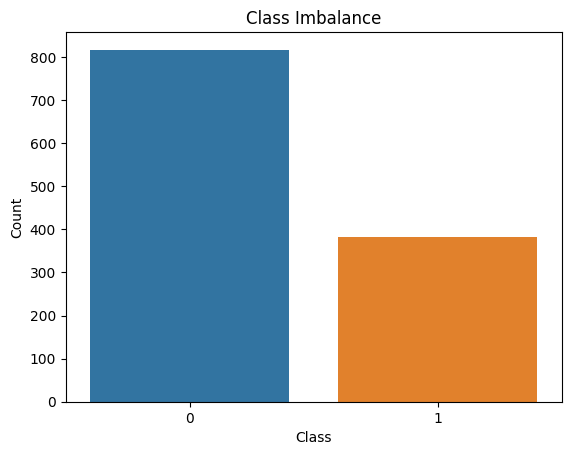

In [239]:
class_counts = df["label"].value_counts()

# Plotting the class imbalance
sns.countplot(x=df["label"])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.show()

This is clearly an issue because we have significantly more 0's than 1's. The issue with class imbalance is that it can lead to biased model performance, as the model may become more inclined to predict the majority class, ignoring the minority class. This results in poor predictive accuracy and an underrepresentation of the minority class. 

To fix this issue, we execute both undersampling and oversampling techniques to achieve a more balanced class distribution. Undersampling is applied to the majority class, while oversampling is applied to the minority class. This new dataset will help us train a more balanced model, capable of making better predictions on the test set.

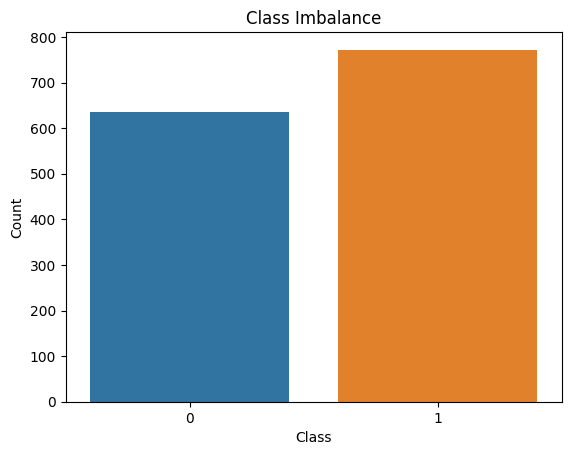

In [240]:
# Create an instance of SMOTEENN (combination of SMOTE and Edited Nearest Neighbors)
sampler = SMOTEENN(random_state=42)

# Resample the data
X_resampled, y_resampled = sampler.fit_resample(X_df, Y_df)

y_resampled.value_counts()

sns.countplot(x=y_resampled)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.show()

Now that we have a more balanced class distribution, we can proceed with further EDA.

### Standardization of Data

In [196]:
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X_resampled)

# Transform the data to standardized values
X_scaled = scaler.transform(X_resampled)

# Create a new DataFrame with scaled values and original column names
X_scaled_df_resampled = pd.DataFrame(X_scaled, columns=X_df.columns)

print(X_scaled_df_resampled.shape)
X_scaled_df_resampled.head()

(1407, 30)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,-1.813323,0.919616,-0.739080,0.091916,0.277301,-0.047055,0.274253,-0.483445,-2.301113,-0.532100,...,0.271008,0.038037,0.712272,1.617638,-0.371416,-0.620613,0.494699,-0.005711,-0.758278,-2.986345
1,1.099671,1.203723,-2.469850,-1.102865,1.786473,0.228763,-0.767844,-0.494289,-1.014428,-0.154304,...,1.251855,0.244644,-0.640251,1.781586,0.052413,0.885044,0.577897,-0.095331,-1.405316,0.709029
2,-2.028142,-0.950169,0.036463,0.750785,-0.007592,-0.908705,0.236461,1.395226,1.157005,1.800467,...,-1.061733,0.708559,1.490330,0.539145,0.039747,0.039765,-0.364155,1.177500,-1.113365,1.705009
3,-0.340449,0.787052,1.880148,-0.223581,-0.996287,2.222133,-0.170342,1.050577,1.184988,-0.496975,...,-0.002982,-0.139597,0.210450,-1.002571,0.917167,-1.272909,-2.297659,1.221297,0.432702,-1.743578
4,-1.069984,-2.106902,1.177834,-1.617526,1.321200,-1.536706,-0.509834,-2.040352,1.198548,1.379815,...,-1.948008,0.435007,0.695102,-0.010732,0.701958,0.908386,0.927420,1.106791,0.654805,0.020864


To compare the performance of our random forests with the resampled dataset, we shall also preserve our original dataset. So, we shall also standardize it. After that, we just set it aside while we use the resampled dataset for further EDA.

In [197]:
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X_df)

# Transform the data to standardized values
X_scaled = scaler.transform(X_df)

# Create a new DataFrame with scaled values and original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X_df.columns)

print(X_scaled_df.shape)
X_scaled_df.head()

(1200, 30)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,1.340092,0.205693,2.006084,0.518709,0.185491,0.608583,1.569640,-0.758634,0.068817,-1.734318,...,-0.146208,-2.106512,-0.763407,2.001857,0.944325,0.398251,-1.956164,-0.794496,0.644515,1.022499
1,-1.826098,0.854323,-0.704378,0.076258,0.227331,-0.023686,0.187468,-0.459737,-2.089394,-0.633574,...,0.254844,-0.068450,0.703511,1.527755,-0.352471,-0.533906,0.503868,-0.057120,-0.709605,-2.824827
2,-0.814839,-1.577284,-1.180128,0.277278,1.893959,-0.336979,0.181666,0.963114,-0.507620,0.544898,...,-0.081528,-0.566004,-0.916295,0.451062,0.446498,-0.945738,-0.416993,-1.075521,-0.933944,0.845797
3,1.063438,1.130154,-2.321947,-1.055514,1.663438,0.236192,-0.870361,-0.470003,-0.905582,-0.243811,...,1.186830,0.155145,-0.626437,1.681044,0.051624,0.907562,0.581052,-0.148884,-1.326526,0.789502
4,-0.790799,1.693087,0.644602,0.323607,-0.054394,-1.650717,0.137943,-1.845989,0.400884,0.357507,...,-0.146283,1.195366,0.874378,-0.860433,-0.415686,-1.182610,-0.145265,2.772245,0.531092,-1.474562


### Histogram for features

Histograms provide insights into the shape, spread, and central tendency of the data, helping to identify patterns, outliers, and potential data issues. Histograms are valuable tools for understanding and analyzing feature distributions in order to inform data preprocessing and modeling decisions.

We shall plot the histograms for all features according to the resampled dataset.

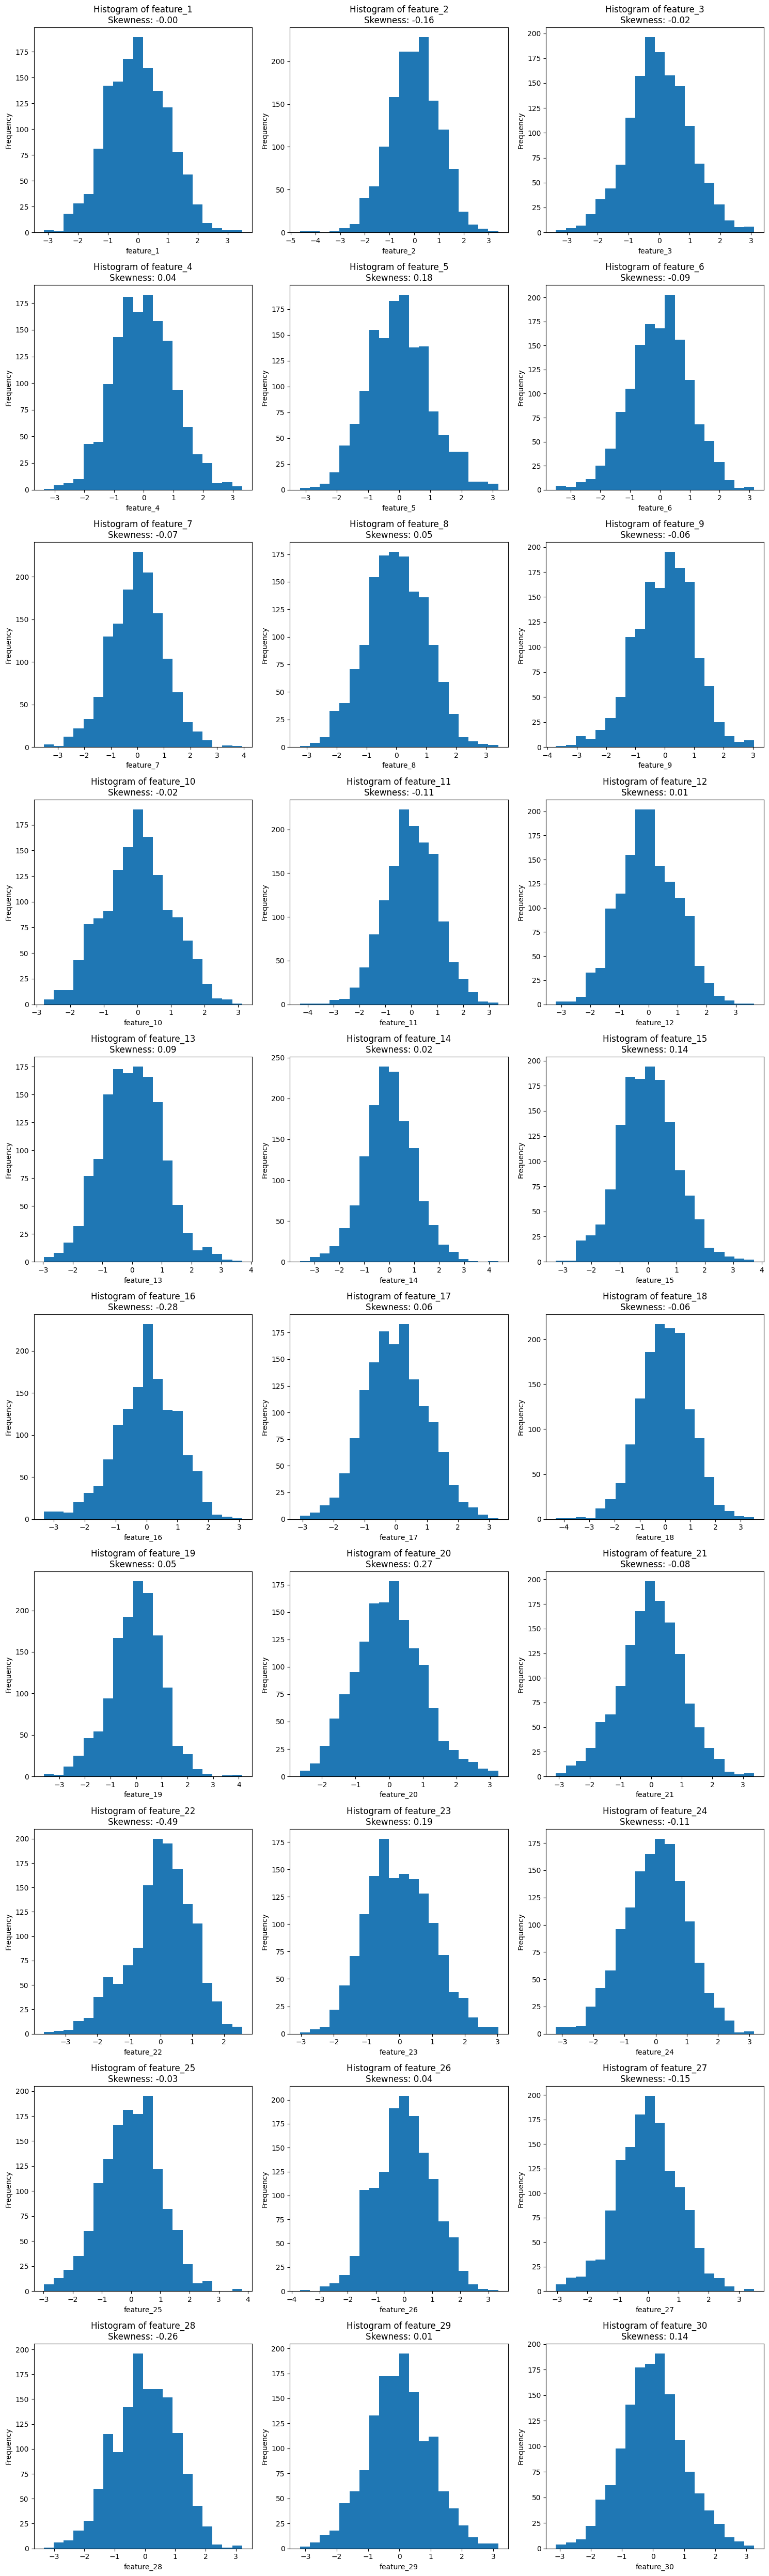

In [224]:
# Plot histograms for each numeric feature
numeric_features = X_scaled_df_resampled.select_dtypes(include=['float64', 'int64'])  # Select numeric features
numeric_columns = numeric_features.columns

num_plots = len(numeric_columns)
num_rows = int(np.ceil(num_plots/3)) # Adjust the number of rows as needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    axes[row, col].hist(X_scaled_df_resampled[column], bins=20)  # Adjust the number of bins as needed
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}\nSkewness: {skew(df[column]):.2f}')

# Remove empty subplots
if num_plots % 3 != 0:
    for i in range(num_plots % 3, 3):
        fig.delaxes(axes[num_rows-1, i])

plt.tight_layout()
plt.show()

The feature distributions in the dataset are predominantly symmetric, indicating a balanced spread of values. However, feature 22 deviates from this pattern and exhibits a left-skewness, suggesting a concentration of lower values. Despite this, the majority of features show a close approximation to a normal distribution, which is beneficial for outlier detection and further analysis. Overall, the dataset demonstrates relatively well-behaved feature distributions, facilitating reliable data exploration and interpretation.

### Outlier detection and removal

In [189]:
def remove_outliers_zscore(data, threshold=3):
    """
    Removes outliers from numeric columns in a dataframe using the z-score method.

    Args:
        data (pandas.DataFrame): The dataframe containing the data.
        threshold (float): The z-score threshold for outlier detection. Defaults to 3.

    Returns:
        pandas.DataFrame: The dataframe with outliers removed.
    """
    # Select numeric columns
    numeric_columns = data.select_dtypes(include=np.number).columns

    # Calculate the z-scores for numeric columns
    z_scores = data[numeric_columns].apply(lambda x: np.abs((x - x.mean()) / x.std()))

    # Create a mask to identify outliers
    mask = z_scores <= threshold

    # Return the dataframe without outliers
    return data[mask.all(axis=1)]

X_noOut_scaled_df = remove_outliers_zscore(X_scaled_df)
print(X_noOut_scaled_df.shape)
X_noOut_scaled_df.head()

(1278, 30)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,-1.813323,0.919616,-0.739080,0.091916,0.277301,-0.047055,0.274253,-0.483445,-2.301113,-0.532100,...,0.271008,0.038037,0.712272,1.617638,-0.371416,-0.620613,0.494699,-0.005711,-0.758278,-2.986345
1,1.099671,1.203723,-2.469850,-1.102865,1.786473,0.228763,-0.767844,-0.494289,-1.014428,-0.154304,...,1.251855,0.244644,-0.640251,1.781586,0.052413,0.885044,0.577897,-0.095331,-1.405316,0.709029
2,-2.028142,-0.950169,0.036463,0.750785,-0.007592,-0.908705,0.236461,1.395226,1.157005,1.800467,...,-1.061733,0.708559,1.490330,0.539145,0.039747,0.039765,-0.364155,1.177500,-1.113365,1.705009
3,-0.340449,0.787052,1.880148,-0.223581,-0.996287,2.222133,-0.170342,1.050577,1.184988,-0.496975,...,-0.002982,-0.139597,0.210450,-1.002571,0.917167,-1.272909,-2.297659,1.221297,0.432702,-1.743578
4,-1.069984,-2.106902,1.177834,-1.617526,1.321200,-1.536706,-0.509834,-2.040352,1.198548,1.379815,...,-1.948008,0.435007,0.695102,-0.010732,0.701958,0.908386,0.927420,1.106791,0.654805,0.020864


In [166]:
Y_noOut_scaled_df = y_resampled.iloc[X_noOut_scaled_df.index]
print(Y_noOut_scaled_df.shape)
print(Y_noOut_scaled_df.value_counts())
Y_noOut_scaled_df.head()

(1278,)
1    707
0    571
Name: label, dtype: int64


0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

Noticeably, the shape changes from (1407,30) to (1278,30). So, we drop around 9% of the data as outliers. For now, we will keep the entire scaled (both resampled and original) dataset. But, during the train test split, we shall use the function above to train the model only on the inliers. (Testing will still take place on all the chosen data points including outliers). We shall implement this training method for both the resampled and original datasets to make the comparison as fair as possible.

### Correlation Matrix


A correlation matrix provides valuable insights into the relationships between variables in a dataset, helping us identify patterns and dependencies among the features. It aids in feature selection, detecting multicollinearity, and understanding the data structure. 

We visualise the results using a heat map, to understand if there is any underlying correlation between features.

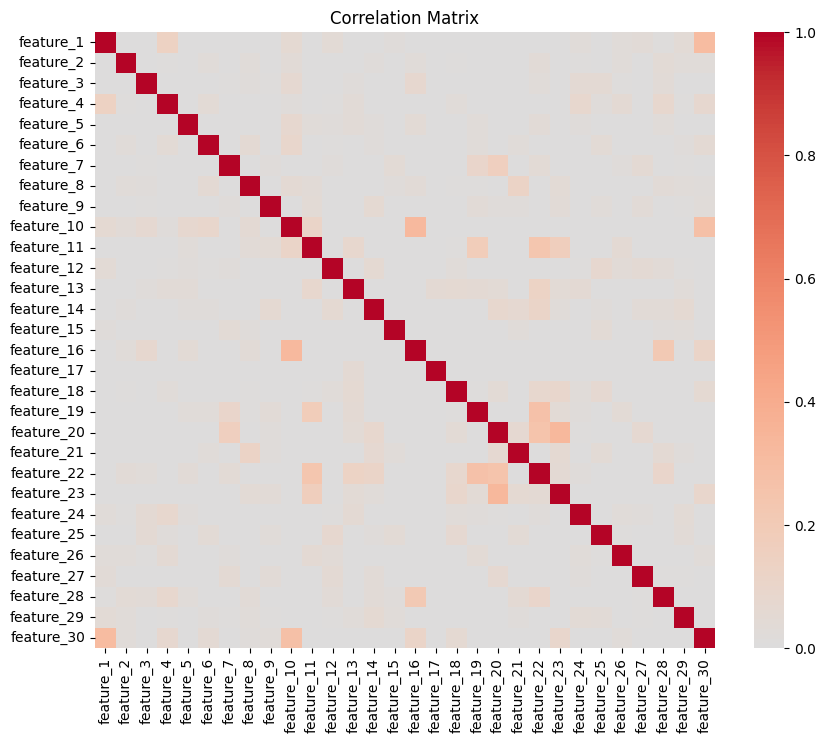

In [198]:
correlation_matrix = X_scaled_df_resampled.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=0, vmax=1, center = 0)

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()

#### Removing highly correlated features

In [199]:
# Set the correlation threshold
threshold = 0.5

# Find feature pairs with correlation above the threshold
high_correlation = np.where(correlation_matrix > threshold)

# Create a set to store the features to remove
features_to_remove = set()

# Iterate over the pairs and decide which features to remove
for i, j in zip(*high_correlation):
    if i != j and i not in features_to_remove and j not in features_to_remove:
        features_to_remove.add(j)  # Remove feature j

# Remove the highly correlated features from the dataset
df_removed = df.drop(features_to_remove, axis=1)

# Print the removed features
print("Features removed:", features_to_remove)

Features removed: set()


This tells us that none of the features are strongly correlated with each other (even with a low threshold). For now, this is good because it tells us we can use all of them in our model. We shall now proceed with PCA and Random Forests using our "cleaned" and standardized dataset.

In [200]:
X_final = X_scaled_df_resampled
Y_final = y_resampled.iloc[X_final.index]

print(X_final.shape)
print(X_final.head())

(1407, 30)
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -1.813323   0.919616  -0.739080   0.091916   0.277301  -0.047055   
1   1.099671   1.203723  -2.469850  -1.102865   1.786473   0.228763   
2  -2.028142  -0.950169   0.036463   0.750785  -0.007592  -0.908705   
3  -0.340449   0.787052   1.880148  -0.223581  -0.996287   2.222133   
4  -1.069984  -2.106902   1.177834  -1.617526   1.321200  -1.536706   

   feature_7  feature_8  feature_9  feature_10  ...  feature_21  feature_22  \
0   0.274253  -0.483445  -2.301113   -0.532100  ...    0.271008    0.038037   
1  -0.767844  -0.494289  -1.014428   -0.154304  ...    1.251855    0.244644   
2   0.236461   1.395226   1.157005    1.800467  ...   -1.061733    0.708559   
3  -0.170342   1.050577   1.184988   -0.496975  ...   -0.002982   -0.139597   
4  -0.509834  -2.040352   1.198548    1.379815  ...   -1.948008    0.435007   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0    0.712

---

In [201]:
print(Y_final.shape)
print(Y_final.head())

(1407,)
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


---
## PCA

First, we will perform PCA to obtain the optimal number of features. This is the number of principal components required to explain 95% of the variance. We visualise these results using a graph of number of features against explained variance. We shall also attempt to plot in 2 dimensions to notice if there is any correlation with the labels.

In [173]:
#Gives the 2-D Plot based on the model's Dimensionality Reduction (first 2 principal components)
def Plot(X, Y, model):
    model.set_params(n_components=2)
    m = model.fit_transform(X)
    colors = ["red","blue"]
    condc = [colors[i] for i in Y]
    cluster_names = ["Zero", "One"]
    visual = pd.DataFrame(m, columns=["PC1","PC2"])
    plt.scatter(visual["PC1"], visual["PC2"], c=condc, s=20)
    handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label=cluster_names[i]) for i, color in enumerate(colors)]
    plt.legend(handles=handles, loc="best", title="Labels")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

In [174]:
#This function gives the explained variance given the number of principal components
def Var_Predicted(X, model,n):
    pred_var_expl = []
    model.set_params(n_components=n)
    matrix = model.fit_transform(X)
    for i in range(1,n+1):
        matrix_current = pd.DataFrame(matrix[:,:i])
        pls = PLSRegression(n_components=i)
        pls.fit(matrix_current, X)                                              
        y = pls.predict(matrix_current)
        pred_var_expl.append(r2_score(X,y,multioutput="variance_weighted"))     
    return pred_var_expl

In [175]:
#Function for 95% explained variance definition
def numb_comp(X, model, eps = 0.95, n=30):
    vars = Var_Predicted(X,model,n)
    for i in range(len(vars)):
        if vars[i]>=0.95:
            return vars, i
    return vars, n

In [176]:
#Plots the Explained Variance based on the Number of Components
def Var_Plot(X, model, eps=0.95, n=30):
    variances, C = numb_comp(X, model, eps)
    print("The Opitmal Number of Dimensions for PCA is", C)
    plt.plot(range(1,n+1), variances, '-', linewidth=2)
    plt.plot([C, C], [0, eps], "k:")
    plt.plot([0, C], [eps, eps], "k:")
    plt.xlabel('Dimensions')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()


In [177]:
def Plot_PCA(X,Y, model):
    Var_Plot(X, model)
    Plot(X,Y,model)

The Opitmal Number of Dimensions for PCA is 26


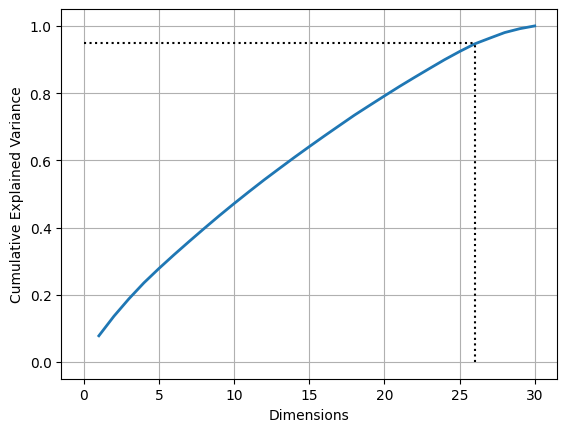

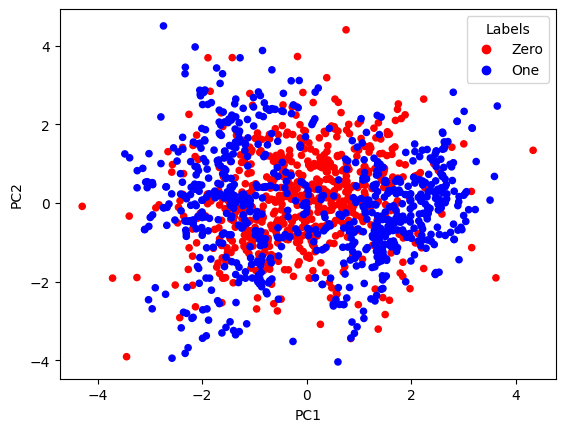

In [194]:
Plot_PCA(X_final,Y_final, PCA())

The Explained Variance - Dimensions Plot tells us that 26 dimensions are sufficient to explain 95% of the variance in our data. This is not a siginificant reduction from 30 dimensions. Therefore, there won't be much improvement in terms of computation and storage.

Furthermore, the plot in 2 Dimensions gives us points that are extremely mixed up: it doesn't seem to have a clear correlation with the labels. 

With the initial part of PCA done, we shall move on to random forests.

---

---
## Random Forests

In [252]:
# Function to plot confusion matrix

def plot_confusion_matrix(confusion_matrix, classes=[0,1]):
    plt.figure(figsize=(8, 6))
    im = plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Add color bar
    color_bar = plt.colorbar(im)
    color_bar.set_label('Score')

    # Set tick labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Rotate tick labels if needed
    plt.xticks(rotation=45, ha="right")

    # Add text annotations
    thresh = confusion_matrix.max() / 2
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

Cross-validation scores: [0.91666667 0.92647059 0.96551724 0.93103448 0.90147783]
Mean cross-validation score: 0.9282333623104414
Accuracy: 0.9539007092198581


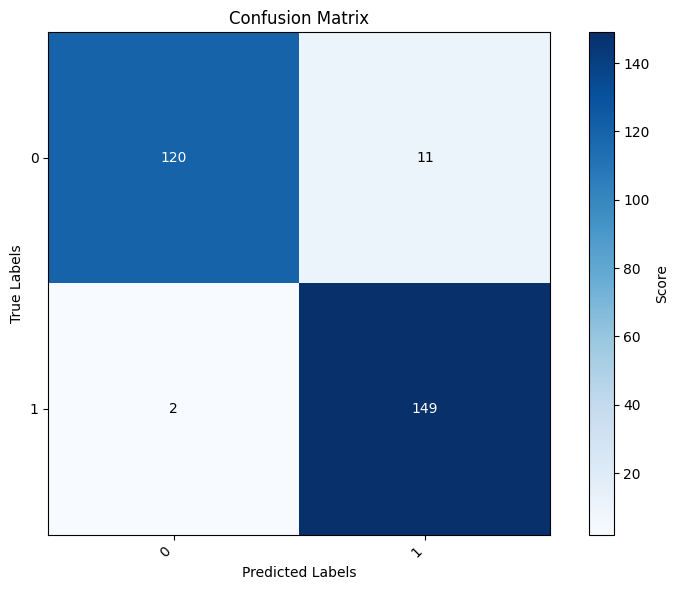

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       131
           1       0.93      0.99      0.96       151

    accuracy                           0.95       282
   macro avg       0.96      0.95      0.95       282
weighted avg       0.96      0.95      0.95       282

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [258]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.2, random_state=42)

X_train = remove_outliers_zscore(X_train)
Y_train = y_resampled.iloc[X_train.index]

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation on the training data
scores = cross_val_score(rf_classifier, X_train, Y_train, cv=5)  # cv is the number of cross-validation folds

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Train the model on the full training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

plot_confusion_matrix(confusion_matrix=confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

params = rf_classifier.get_params()
print(params)


Let us check if this model also performs well on the original dataset.

Cross-validation scores: [0.84180791 0.83050847 0.84659091 0.80113636 0.82386364]
Mean cross-validation score: 0.8287814586543402
Accuracy: 0.8666666666666667
Confusion matrix:


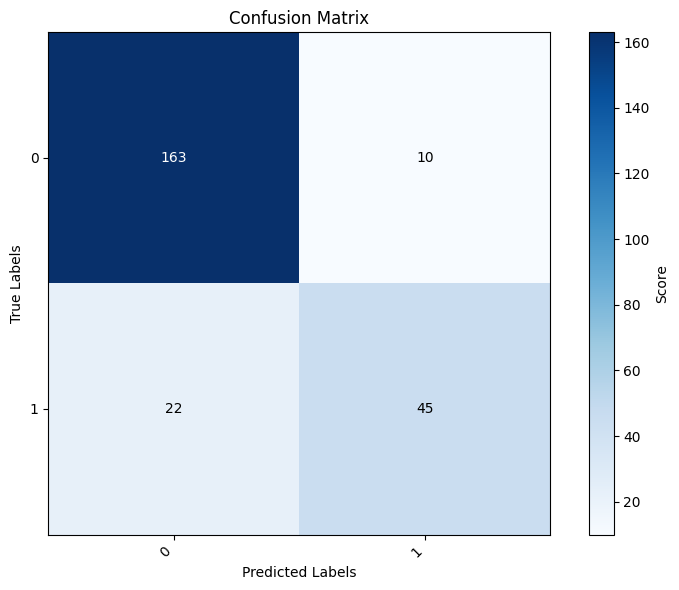

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       173
           1       0.82      0.67      0.74        67

    accuracy                           0.87       240
   macro avg       0.85      0.81      0.82       240
weighted avg       0.86      0.87      0.86       240

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [259]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, Y_df, test_size=0.2, random_state=42)

X_train = remove_outliers_zscore(X_train)
Y_train = Y_df.iloc[X_train.index]

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation on the training data
scores = cross_val_score(rf_classifier, X_train, Y_train, cv=5)  # cv is the number of cross-validation folds

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Train the model on the full training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:")

plot_confusion_matrix(confusion_matrix=confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))


params = rf_classifier.get_params()
print(params)

Clearly, the model performs much better after class balancing is carried out. On average, the model trains better on the resampled dataset as opposed to the original dataset. Furthermore, the F1 score, which is a better metric for imbalanced classes, is higher on the resampled dataset as opposed to the imbalanced dataset. We notice especially that the F1 score for the imbalanced dataset is low for the label '1' and higher for the label '0'. This tells us the random forest is biased against the minority class and biased towards the majority class (which is usually what happens with imbalanced datasets)

Moving forward, we shall only use the resampled dataset for hyperparameter tuning.

### Hyperparameter Tuning

Hyperparameter tuning using grid search CV allows us to systematically explore different combinations of hyperparameters for the random forest algorithm. By searching over a predefined parameter grid and evaluating performance using cross-validation, we can find the optimal set of hyperparameters that maximize the model's performance on unseen data.

We shall only perform a grid search on 4 hyperparameters to make sure it's not too computationally expensive while choosing the 4 most hyperparameters. A brief explanation is given below along with the other features which could have been used. Notice we don't need to use the class balancing parameter of random forests because we have already done that.

In [261]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.2, random_state=42)

X_train = remove_outliers_zscore(X_train)
Y_train = y_resampled.iloc[X_train.index]

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200,250,300],  # Number of decision trees in the forest
    'max_depth': [None,5,10],  # Maximum depth of each tree
    'min_samples_split': [2,5,10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    # 'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    # 'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    # 'bootstrap': [True, False],  # Whether to use bootstrapping when building trees
    
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 250, 300]})

With the grid search complete, we can move on to test the classifier on the dataset using the best hyperparameters. We define a random forest classifier using said hyperparameters.

### Testing the Hyperparameters

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross-validation scores: [0.93627451 0.95098039 0.96551724 0.93103448 0.92118227]
Mean cross-validation score: 0.9409977784217135
Accuracy: 0.9645390070921985
Confusion matrix:


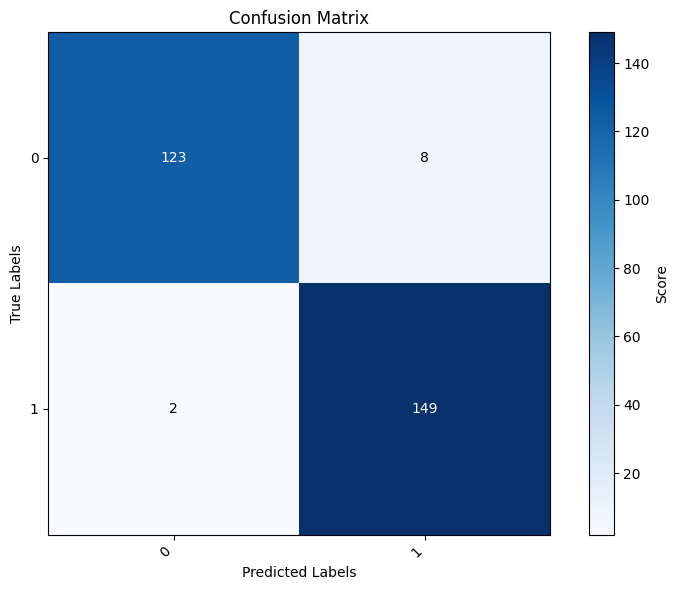

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       131
           1       0.95      0.99      0.97       151

    accuracy                           0.96       282
   macro avg       0.97      0.96      0.96       282
weighted avg       0.97      0.96      0.96       282



In [263]:
# Printing Hyperparameters
print(grid_search.best_params_)

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**grid_search.best_params_)
best_rf_classifier.fit(X_train, Y_train)

# Perform cross-validation on the training data
scores = cross_val_score(best_rf_classifier, X_train, Y_train, cv=5)  # cv is the number of cross-validation folds

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Train the model on the full training data
best_rf_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:")
plot_confusion_matrix(confusion_matrix=confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

We get a slight improvement in accuracy, so we shall continue our use of grid search in the next section of PCA and random forests.

### With PCA

In this section, we are going to see the accuracy of the random forest using PCA-reduced datasets. We will then plot a graph of number of components (features) against mean accuracy of the random forest. We will also include the standard deviation of the cross validation scores as error bars in our graph.

(1407, 26)
Cross-validation scores: [0.85990338 0.85990338 0.90338164 0.85024155 0.8592233 ]
Mean cross-validation score: 0.8665306505323391
Accuracy: 0.875886524822695


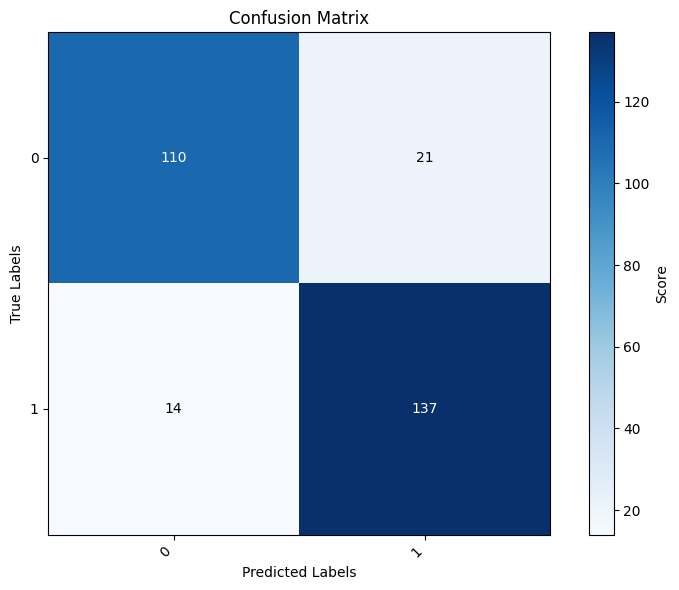

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       131
           1       0.87      0.91      0.89       151

    accuracy                           0.88       282
   macro avg       0.88      0.87      0.87       282
weighted avg       0.88      0.88      0.88       282



In [264]:
pca = PCA(n_components=26)  # Set the number of components you want to keep, we choose 26 because it was the optimal number.

X_pca = pca.fit_transform(X_final)

X_pca_df = pd.DataFrame(X_pca)

print(X_pca.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_pca_df, Y_final, test_size=0.2,random_state=42)

X_train = remove_outliers_zscore(X_train)
Y_train = Y_final.iloc[X_train.index]

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200,250,300],  # Number of decision trees in the forest
    'max_depth': [None,5,10],  # Maximum depth of each tree
    'min_samples_split': [2,5,10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    # 'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    # 'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    # 'bootstrap': [True, False],  # Whether to use bootstrapping when building trees
}

# Perform grid search with cross-validation
grid_search_pca = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search_pca.fit(X_train, Y_train)

# Train the model with the best hyperparameters
best_rf_classifier_pca = RandomForestClassifier(**grid_search_pca.best_params_)
best_rf_classifier_pca.fit(X_train, Y_train)

# Perform cross-validation on the training data
scores = cross_val_score(best_rf_classifier_pca, X_train, Y_train, cv=5)  # cv is the number of cross-validation folds

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Train the model on the full training data
best_rf_classifier_pca.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = best_rf_classifier_pca.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
plot_confusion_matrix(confusion_matrix=confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Noticeably, our accuracy drops. While the runtime to train the random forest is lower (full dataset took 8 minutes while the reduced dataset took 6 minutes, but the runtime fluctuates a lot so maybe it's not reliable), perhaps it is not worth lowering our accuracy from 96% to 89%. 

In the next section, we will define a general function which returns the mean accuracy of running PCA for each choice of number of principal components. This will give us the complete picture to analyse PCA and dimensionality reduction against random forest performance. 

In [221]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def get_pca_accuracy(X, y, n_components):
    """
    Perform PCA with specified number of components, remove outliers from the training set,
    train a random forest classifier on the reduced dataset using cross-validation and grid search,
    and return the accuracy.

    Args:
        X (array-like): The feature matrix.
        y (array-like): The target variable.
        n_components (int): The number of components to use for PCA.

    Returns:
        float: The accuracy of the random forest model.
    """
    pca = PCA(n_components=n_components)  

    X_pca = pca.fit_transform(X)

    X_pca_df = pd.DataFrame(X_pca)

    print(X_pca.shape)

    X_train, X_test, Y_train, Y_test = train_test_split(X_pca_df, y, test_size=0.2,random_state=42)

    X_train = remove_outliers_zscore(X_train)
    Y_train = y.iloc[X_train.index]

    # Create an instance of RandomForestClassifier
    rf_classifier = RandomForestClassifier()

    # Define the hyperparameter grid
    param_grid = {
        'n_estimators': [200,250,300],  # Number of decision trees in the forest
        'max_depth': [None,5,10],  # Maximum depth of each tree
        'min_samples_split': [2,5,10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        # 'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
        # 'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
        # 'bootstrap': [True, False],  # Whether to use bootstrapping when building trees
    }

    # Perform grid search with cross-validation
    grid_search_pca = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
    grid_search_pca.fit(X_train, Y_train)

    # Train the model with the best hyperparameters
    best_rf_classifier_pca = RandomForestClassifier(**grid_search_pca.best_params_)
    best_rf_classifier_pca.fit(X_train, Y_train)

    # Perform cross-validation on the training data
    scores = cross_val_score(best_rf_classifier_pca, X_train, Y_train, cv=5)  # cv is the number of cross-validation folds

    # Print the cross-validation scores
    print("Cross-validation scores  %0.5f %%(+/- %0.5f %%)" % (scores.mean()*100, scores.std()*100))

    # Train the model on the full training data
    best_rf_classifier_pca.fit(X_train, Y_train)

    # Make predictions on the testing data
    Y_pred = best_rf_classifier_pca.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy:", accuracy)
    print("Confusion matrix:")
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))

    return accuracy, scores.std()

get_pca_accuracy(X_final, Y_final, n_components = 26) # Set the number of components you want to keep, we choose 26 because it was the optimal number.


(1407, 26)
Cross-validation scores  88.10234 %(+/- 2.31133 %)
Accuracy: 0.900709219858156
Confusion matrix:
[[115  16]
 [ 12 139]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       131
           1       0.90      0.92      0.91       151

    accuracy                           0.90       282
   macro avg       0.90      0.90      0.90       282
weighted avg       0.90      0.90      0.90       282



(0.900709219858156, 0.023113272948209564)

With the function defined, we can now test our classifier against our reduced datasets for all the possible options (from 1 feature to the full dataset containing 30 features). To compare them, we plot the results in a graph.

(1407, 1)
Cross-validation scores  69.77778 %(+/- 3.90505 %)
Accuracy: 0.6631205673758865
Confusion matrix:
[[ 85  46]
 [ 49 102]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       131
           1       0.69      0.68      0.68       151

    accuracy                           0.66       282
   macro avg       0.66      0.66      0.66       282
weighted avg       0.66      0.66      0.66       282

(1407, 2)
Cross-validation scores  72.21151 %(+/- 3.21870 %)
Accuracy: 0.7056737588652482
Confusion matrix:
[[ 84  47]
 [ 36 115]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       131
           1       0.71      0.76      0.73       151

    accuracy                           0.71       282
   macro avg       0.70      0.70      0.70       282
weighted avg       0.71      0.71      0.70       282

(1407, 3)
Cross-validation scores  77.94643 %(+/- 2.81781 %)
Accuracy: 0.79787234042

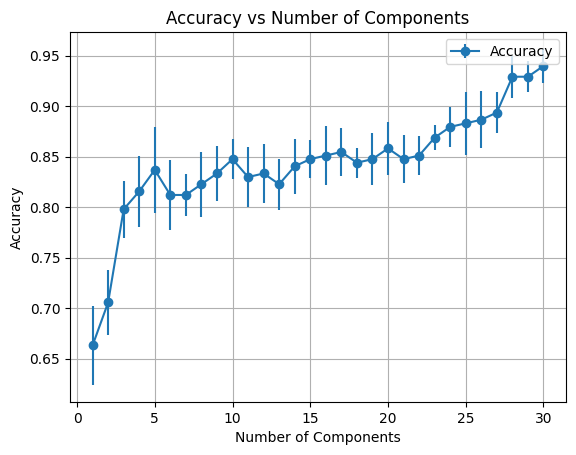

In [223]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pca_accuracy(X,y):
    components = np.arange(1, 31)  # Number of components from 1 to 30
    accuracies = []
    errors = []

    for n in components:
        accuracy, error = get_pca_accuracy(X,y,n)
        accuracies.append(accuracy)
        errors.append(error)

    plt.errorbar(components, accuracies, yerr=errors, fmt='o-', label='Accuracy')
    plt.xlabel('Number of Components')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Components')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_pca_accuracy(X_final,Y_final)

Our model's performance was assessed using the accuracy on the test set, providing a measure of its generalization ability. To capture the variability observed during training, we also calculated the standard deviation of cross-validation scores on the training set. Combining these metrics in our analysis enables us to present the average test set accuracy along with an indication of the performance variability during training.

From the graph, we can deduce that the accuracy generally increases when the number of features increases. The full dataset produced the largest accuracy on the test set. In addition, computationally, while it does take longer to train the random forest classifier using a larger dataset, this difference is not huge as opposed to the significant drop in accuracy when reduced datasets are used.

In conclusion, it is preferred to use the full dataset as opposed to the PCA reduced datasets because the full dataset guarantees the highest accuracy.

---
## Final Testing on Anonymous Test Data

As discussed in the previous section, we are going to implement a random forest classifier on the full dataset to generate the highest accuracy. Furthermore, to improve the performance of our classifier, we shall also standardize the test dataset. We will proceed with the same technique as above; Our training set becomes the first dataset (resampled and standardized). We will remove the outliers and perform a grid search (with cross validation) on this dataset. After finding the best hyperparameters, we shall fit the random forest with said hyperparameters to the training set. Finally, we predict the labels for the unlabelled test data.

In [266]:
df = pd.read_csv("mldata_0003174597.TEST_FEATURES.csv",engine='python',index_col=0)

X_df_test = df[["feature_" + str(i) for i in range(1,31)]]

X_df_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
id,,,,,,,,,,,,,,,,,,,,,
0,-1.564815,-0.279022,1.022830,1.812516,0.427716,-0.122033,5.510014,1.049964,-0.365408,-0.850083,...,0.576730,0.175352,2.062613,-0.392209,0.543549,-0.507065,-0.650535,-1.914558,0.014384,-3.358558
1,1.889936,0.478486,0.371023,0.455015,-1.316594,0.081001,-1.871282,0.326100,2.240070,4.901978,...,-2.292177,0.598441,-0.356262,-0.372476,1.496321,1.116846,0.118472,-1.967708,-0.400915,-0.461526
2,1.051112,-1.677294,-0.558699,0.738689,-0.613111,1.845267,2.488074,1.452759,0.428820,0.355718,...,-0.232147,2.194391,-2.326564,-0.083531,1.155914,-0.571040,-0.603836,-1.109891,-1.514384,-1.911357
3,-1.276672,0.086394,0.120035,-0.475927,-0.031384,0.223294,2.643479,0.795390,-0.624553,-2.346240,...,0.492835,-0.013075,-0.748379,1.810406,-0.471949,-0.973480,0.747215,-2.648573,0.870515,-1.390343
4,0.378038,0.293879,-2.036817,-1.369984,0.416592,-0.374670,1.112001,-1.018806,1.409291,-2.208434,...,0.002746,-1.290903,-1.401915,-0.399364,0.777205,-0.099626,-1.731098,0.257723,-0.353695,1.392189


In [267]:
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X_df_test)

# Transform the data to standardized values
X_scaled_test = scaler.transform(X_df_test)

# Create a new DataFrame with scaled values and original column names
X_scaled_df_test = pd.DataFrame(X_scaled_test, columns=X_df_test.columns)

print(X_scaled_df_test.shape)
X_scaled_df_test.head()

(1200, 30)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,-0.689460,-0.404606,0.907819,1.682605,0.328346,-0.213759,2.363909,0.985898,-0.506986,-0.792319,...,0.502345,-0.286242,0.920862,-0.535986,0.487143,-0.598030,-0.757170,-0.875883,-0.102663,-1.407538
1,0.719534,0.343531,0.255102,0.328649,-1.506377,-0.008725,-1.305914,0.235326,2.200871,2.017201,...,-2.355571,-0.057591,-0.223537,-0.515408,1.466162,1.078385,0.001537,-0.898663,-0.502579,-0.004479
2,0.377426,-1.785581,-0.675918,0.611583,-0.766431,1.772918,0.861465,1.403556,0.318451,-0.203361,...,-0.303434,0.804911,-1.155710,-0.214087,1.116378,-0.664074,-0.711096,-0.531001,-1.574802,-0.706646
3,-0.571943,-0.043711,0.003764,-0.599862,-0.154551,0.134970,0.938729,0.721931,-0.776314,-1.523097,...,0.418772,-0.388073,-0.409052,1.760969,-0.556331,-1.079526,0.621860,-1.190482,0.721755,-0.454313
4,0.102918,0.161208,-2.156099,-1.491584,0.316645,-0.468883,0.177311,-1.159202,1.337447,-1.455788,...,-0.069440,-1.078652,-0.718248,-0.543447,0.727235,-0.177418,-1.823261,0.055160,-0.457107,0.893293


In [268]:
X_train, Y_train = X_final, Y_final

X_train = remove_outliers_zscore(X_train)
Y_train = y_resampled.iloc[X_train.index]

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200,250,300],  # Number of decision trees in the forest
    'max_depth': [None,5,10],  # Maximum depth of each tree
    'min_samples_split': [2,5,10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    # 'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    # 'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    # 'bootstrap': [True, False],  # Whether to use bootstrapping when building trees
    
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 250, 300]})

After fitting the classifier to the first dataset, we predict the labels of the test set. These are then written to a text file.

In [269]:
# Printing Hyperparameters
print(grid_search.best_params_)

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**grid_search.best_params_)
best_rf_classifier.fit(X_train, Y_train)

Y_pred = best_rf_classifier.predict(X_scaled_df_test)

with open('test_predictions.txt', 'w') as file:
    for value in Y_pred:
        file.write(str(value) + '\n')


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
